# Nutrients data

Let's first load in some libraries that we are going to use today. If you are not sure whether you have the library installed, you can embed *install.packages* within an *if* statement, like this

In [1]:
if (!requireNamespace("RNetCDF", quietly = TRUE)) {
  install.packages("RNetCDF")
}
library(RNetCDF)
if (!requireNamespace("writexl", quietly = TRUE)) {
  install.packages("writexl")
}
library(writexl)

The data are available via a THREDDS server that you can find here:
https://opendap1.nodc.no/opendap/hyrax/projects/nansen_legacy/nutrients/contents.html

If you open the link above, you can navigate to different NetCDF files, and you will be linked to OPeNDAP data access forms like this one:
https://opendap1.nodc.no/opendap/hyrax/projects/nansen_legacy/nutrients/aen_q4_bottle_data_nutrients_2019711.nc.html

OPeNDAP makes it possible to access data over the internet without you having to download the data to your computer first. You can just remove the *html* suffix from the URL above and include it in your R script in the same way that you might include some absolute filepath to a file on your computer. 

So now let's load the data into R for this cast.

In [2]:
url <- 'https://opendap1.nodc.no/opendap/hyrax/projects/nansen_legacy/nutrients/aen_q4_bottle_data_nutrients_2019711.nc'
data <- open.nc(url)
print.nc(data)

netcdf classic {
dimensions:
	TIME = 17 ;
	Z = 18 ;
	maxStrlen64 = 64 ;
variables:
	NC_DOUBLE TIME(TIME) ;
		NC_CHAR TIME:units = "days since 1950-01-01T00:00:00Z" ;
		NC_CHAR TIME:calendar = "standard" ;
		NC_CHAR TIME:standard_name = "time" ;
		NC_CHAR TIME:long_name = "Chronological Julian Date" ;
		NC_DOUBLE TIME:valid_min = 0 ;
		NC_DOUBLE TIME:valid_max = 2500000 ;
		NC_CHAR TIME:axis = "T" ;
	NC_CHAR cruise(maxStrlen64, TIME) ;
		NC_CHAR cruise:_FillValue = "" ;
		NC_CHAR cruise:long_name = "Cruise number" ;
		NC_INT cruise:string_length = 10 ;
	NC_CHAR station(maxStrlen64, TIME) ;
		NC_CHAR station:_FillValue = "" ;
		NC_CHAR station:long_name = "Station" ;
		NC_CHAR station:units = "#" ;
		NC_INT station:string_length = 10 ;
	NC_CHAR cast(maxStrlen64, TIME) ;
		NC_CHAR cast:_FillValue = "" ;
		NC_CHAR cast:long_name = "CTD cast number" ;
		NC_INT cast:string_length = 3 ;
	NC_FLOAT PSAL(Z, TIME) ;
		NC_FLOAT PSAL:_FillValue = -9999 ;
		NC_CHAR PSAL:units = "Dmnless" ;
		NC_CHAR

There are 3 dimensions; TIME, Z and maxStrlen64. 

We can deduce that there are 17 depth profiles and there are 18 points of depth in each. This doesn't mean that there are 18 samples for every station; more likely there is a lot of 'empty' space in this file where a measurement was not taken at a certain depth. This is necessary for us to use a single depth dimension for a range of different depth profiles, which each sample different depths.

There are some 1D variables, like *LONGITUDE* and *LATITUDE*, each a function of time. But most of the variables are 2D.

Most of the data variables have dimensions *Z* and *TIME*.

Some metadata is stored in variables like *station* and *cast* and *cruise*. These variables have dimensions *maxStrlen64* and *TIME*. This is because they contain text. *maxStrlen64* has a value of 64, which means that no text value should be longer than 64 characters long. So even though there are 2 dimensions, you have one text value (e.g. one station name) per time.

Let's access some of the coordinate and data variables.

In [3]:
pressure <- var.get.nc(data, "PRESSURE")
pressure

3621.132,2927.991,2004.164,871.436,201.465,211.932,201.796,135.949,203.936,330.989,198.234,291.462,177.767,177.805,120.784,301.860,315.573
2500.721,750.370,1750.716,751.068,150.900,200.174,120.500,120.362,150.334,200.580,151.539,200.712,150.295,150.535,90.713,200.579,200.211
2000.283,501.008,1501.269,501.803,120.667,151.198,90.533,90.597,120.386,150.342,90.829,150.716,120.341,120.105,50.513,150.725,150.154
1750.291,200.965,1000.559,203.728,90.370,120.736,60.972,60.412,90.318,120.218,60.488,120.353,90.286,90.198,40.427,120.903,90.265
1501.069,150.542,749.709,152.381,60.016,90.098,50.346,50.301,60.876,60.502,50.378,90.547,60.698,59.925,30.455,60.837,39.418
1000.419,120.306,500.943,121.533,49.875,60.250,40.553,40.332,50.402,50.355,40.429,60.448,50.879,49.761,20.076,50.641,30.484
750.033,90.308,202.382,91.170,40.474,50.339,30.263,30.110,39.968,40.898,30.436,49.860,40.990,40.532,10.462,40.791,20.591
500.130,60.446,151.072,61.094,29.979,39.982,20.123,20.260,30.616,30.437,20.256,40.130,30.122,29.778,NA,NA,10.237
200.118,50.363,121.168,49.831,20.405,29.955,10.534,9.983,20.127,19.957,10.239,30.033,20.643,20.175,NA,NA,NA
149.430,40.254,91.780,40.401,10.133,20.313,NA,NA,10.383,10.182,NA,20.045,NA,10.053,NA,NA,NA
120.215,30.312,61.373,30.413,NA,10.465,NA,NA,NA,NA,NA,10.058,NA,NA,NA,NA,NA


As you can see, *PRESSURE* is a 2D matrix. If we want the data for the 5th profile only:

In [4]:
var.get.nc(data, "PRESSURE", start=c(NA, 5), count=c(NA, 1))

[1] 201.465 150.900 120.667  90.370  60.016  49.875  40.474  29.979  20.405
[10]  10.133      NA      NA      NA      NA      NA      NA      NA      NA

Often, however, it is more useful to be able to access individual profiles based on the time or latitude and longitude.

### Access data for one latitude (or longitude)

Let's look at the latitudes in the data first.

In [5]:
latitude <- var.get.nc(data, "LATITUDE")
latitude

[1] 82.06983 81.69283 81.61816 81.54567 81.45917 81.31384 80.99800 80.52067
 [9] 79.99650 79.73200 79.23867 78.75017 77.99900 77.49966 77.00517 76.49883
[17] 75.99950

Let's select data for only one of these latitudes.

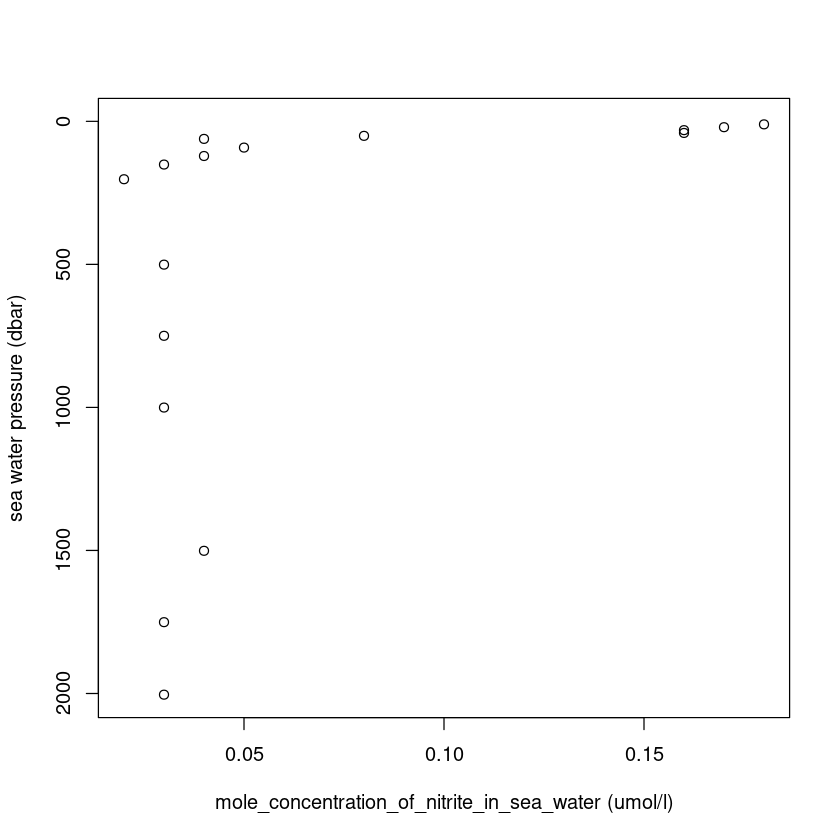

In [6]:
desired_latitude <- 81.6181640625
# Finding index of the value
latitude_index <- which(latitude == desired_latitude)
# Extract NTRI values just for that latitude
ntri <- var.get.nc(data, "NTRI", start=c(NA, latitude_index), count=c(NA, 1))
# Get the associated pressure values
pres <- var.get.nc(data, "PRESSURE", start=c(NA, latitude_index), count=c(NA, 1))

plot(
    ntri,
    pres,
    type='p',
    ylim=c(max(pres, na.rm = TRUE),0),
    ylab='sea water pressure (dbar)',
    xlab= 'mole_concentration_of_nitrite_in_sea_water (umol/l)'
    
)

### Access data for one time

This is similar to the above, but there is an extra step because of the units used for time.

In [7]:
att.get.nc(data,"TIME","units")

[1] "days since 1950-01-01T00:00:00Z"

In [8]:
days_since_1950 <- var.get.nc(data,"TIME")
days_since_1950

[1] 25538.02 25539.62 25539.79 25540.34 25541.15 25541.27 25541.58 25541.98
 [9] 25542.80 25543.66 25544.51 25544.88 25545.42 25545.74 25546.31 25546.74
[17] 25547.72

Let's convert these to timestamps so we can see what times are in our dataset.

In [9]:
# Define the origin date
origin_date <- as.POSIXct("1950-01-01 00:00:00", tz = "UTC")

# Convert days to seconds
seconds_since_1950 <- days_since_1950 * 24 * 60 * 60

# Convert to timestamps
timestamps <- origin_date + seconds_since_1950
timestamps

 [1] "2019-12-03 00:22:25 UTC" "2019-12-04 14:57:48 UTC"
 [3] "2019-12-04 19:03:33 UTC" "2019-12-05 08:14:10 UTC"
 [5] "2019-12-06 03:34:20 UTC" "2019-12-06 06:29:21 UTC"
 [7] "2019-12-06 13:52:00 UTC" "2019-12-06 23:37:34 UTC"
 [9] "2019-12-07 19:09:58 UTC" "2019-12-08 15:45:32 UTC"
[11] "2019-12-09 12:09:35 UTC" "2019-12-09 21:10:25 UTC"
[13] "2019-12-10 10:10:10 UTC" "2019-12-10 17:41:09 UTC"
[15] "2019-12-11 07:32:47 UTC" "2019-12-11 17:38:32 UTC"
[17] "2019-12-12 17:16:19 UTC"

So we need to time series (above), work out what index in the time series our desired date corresponds to, and then select from the data variable based on that index.

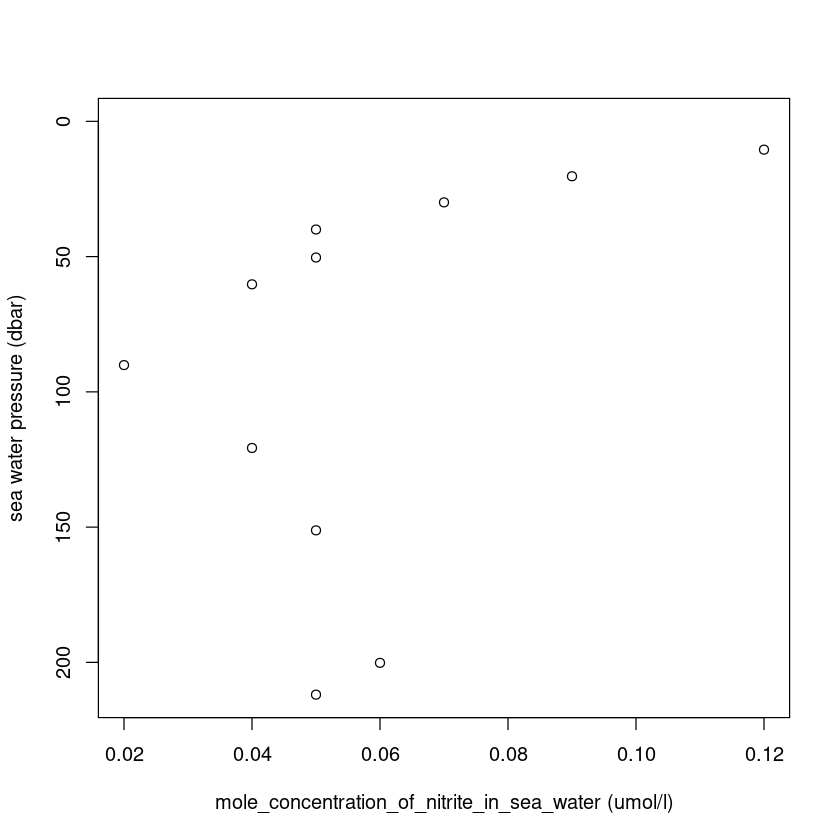

In [10]:
desired_time <- as.POSIXct("2019-12-06 06:29:21", tz = "UTC")

# Finding the index of that value
time_index <- which(timestamps == desired_time)

# Extract NTRI values just for that time
ntri <- var.get.nc(data, "NTRI", start=c(NA, time_index), count=c(NA, 1))
# Get the associated pressure values
pres <- var.get.nc(data, "PRESSURE", start=c(NA, time_index), count=c(NA, 1))

plot(
    ntri,
    pres,
    type='p',
    ylim=c(max(pres, na.rm = TRUE),0),
    ylab='sea water pressure (dbar)',
    xlab= 'mole_concentration_of_nitrite_in_sea_water (umol/l)'
    
)

## Citing the data

Please cite the data for the cruise or cruises you have used the data from.

For the data used in this notebook, the citation is:

*Melissa Chierici, Elizabeth Jones, Helene Hodal Lødemel (2021) Water column data on dissolved inorganic nutrients (nitrite, nitrate, phosphate and silicic acid) from the Nansen LEGACY seasonal cruise Q4, 2019711 with R.V. Kronprins Haakon https://doi.org/10.21335/NMDC-1629206101*

## Citing this tutorial

If you find this tutorial series useful for your work, consider citing the repository:

Luke Marsden. (2024, May 24). Accessing Nansen Legacy data in R. Zenodo. https://doi.org/10.5281/zenodo.11277693

[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.11277693.svg)](https://doi.org/10.5281/zenodo.11277693)
